<a href="https://colab.research.google.com/github/narennravi/Structured_Data-Assignment/blob/master/003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
#load the data
train = pd.read_parquet('/content/train.parquet')

In [3]:
# Filter for "Target Drug" incidents only
train_target = train[train['Incident'] == 'TARGET DRUG']

In [4]:
# Create matrix of prescription counts
train_pivot = train_target.pivot_table(index='Patient-Uid', columns=pd.Grouper(key='Date', freq='M'), 
                                 values='Incident', aggfunc='count', fill_value=0)


In [5]:
# Normalize matrix by row
train_norm = train_pivot.div(train_pivot.sum(axis=1), axis=0)

# Cluster patients using KMeans with 6 clusters
kmeans = KMeans(n_clusters=6)
kmeans.fit(train_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

## **NOTE:-**

### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

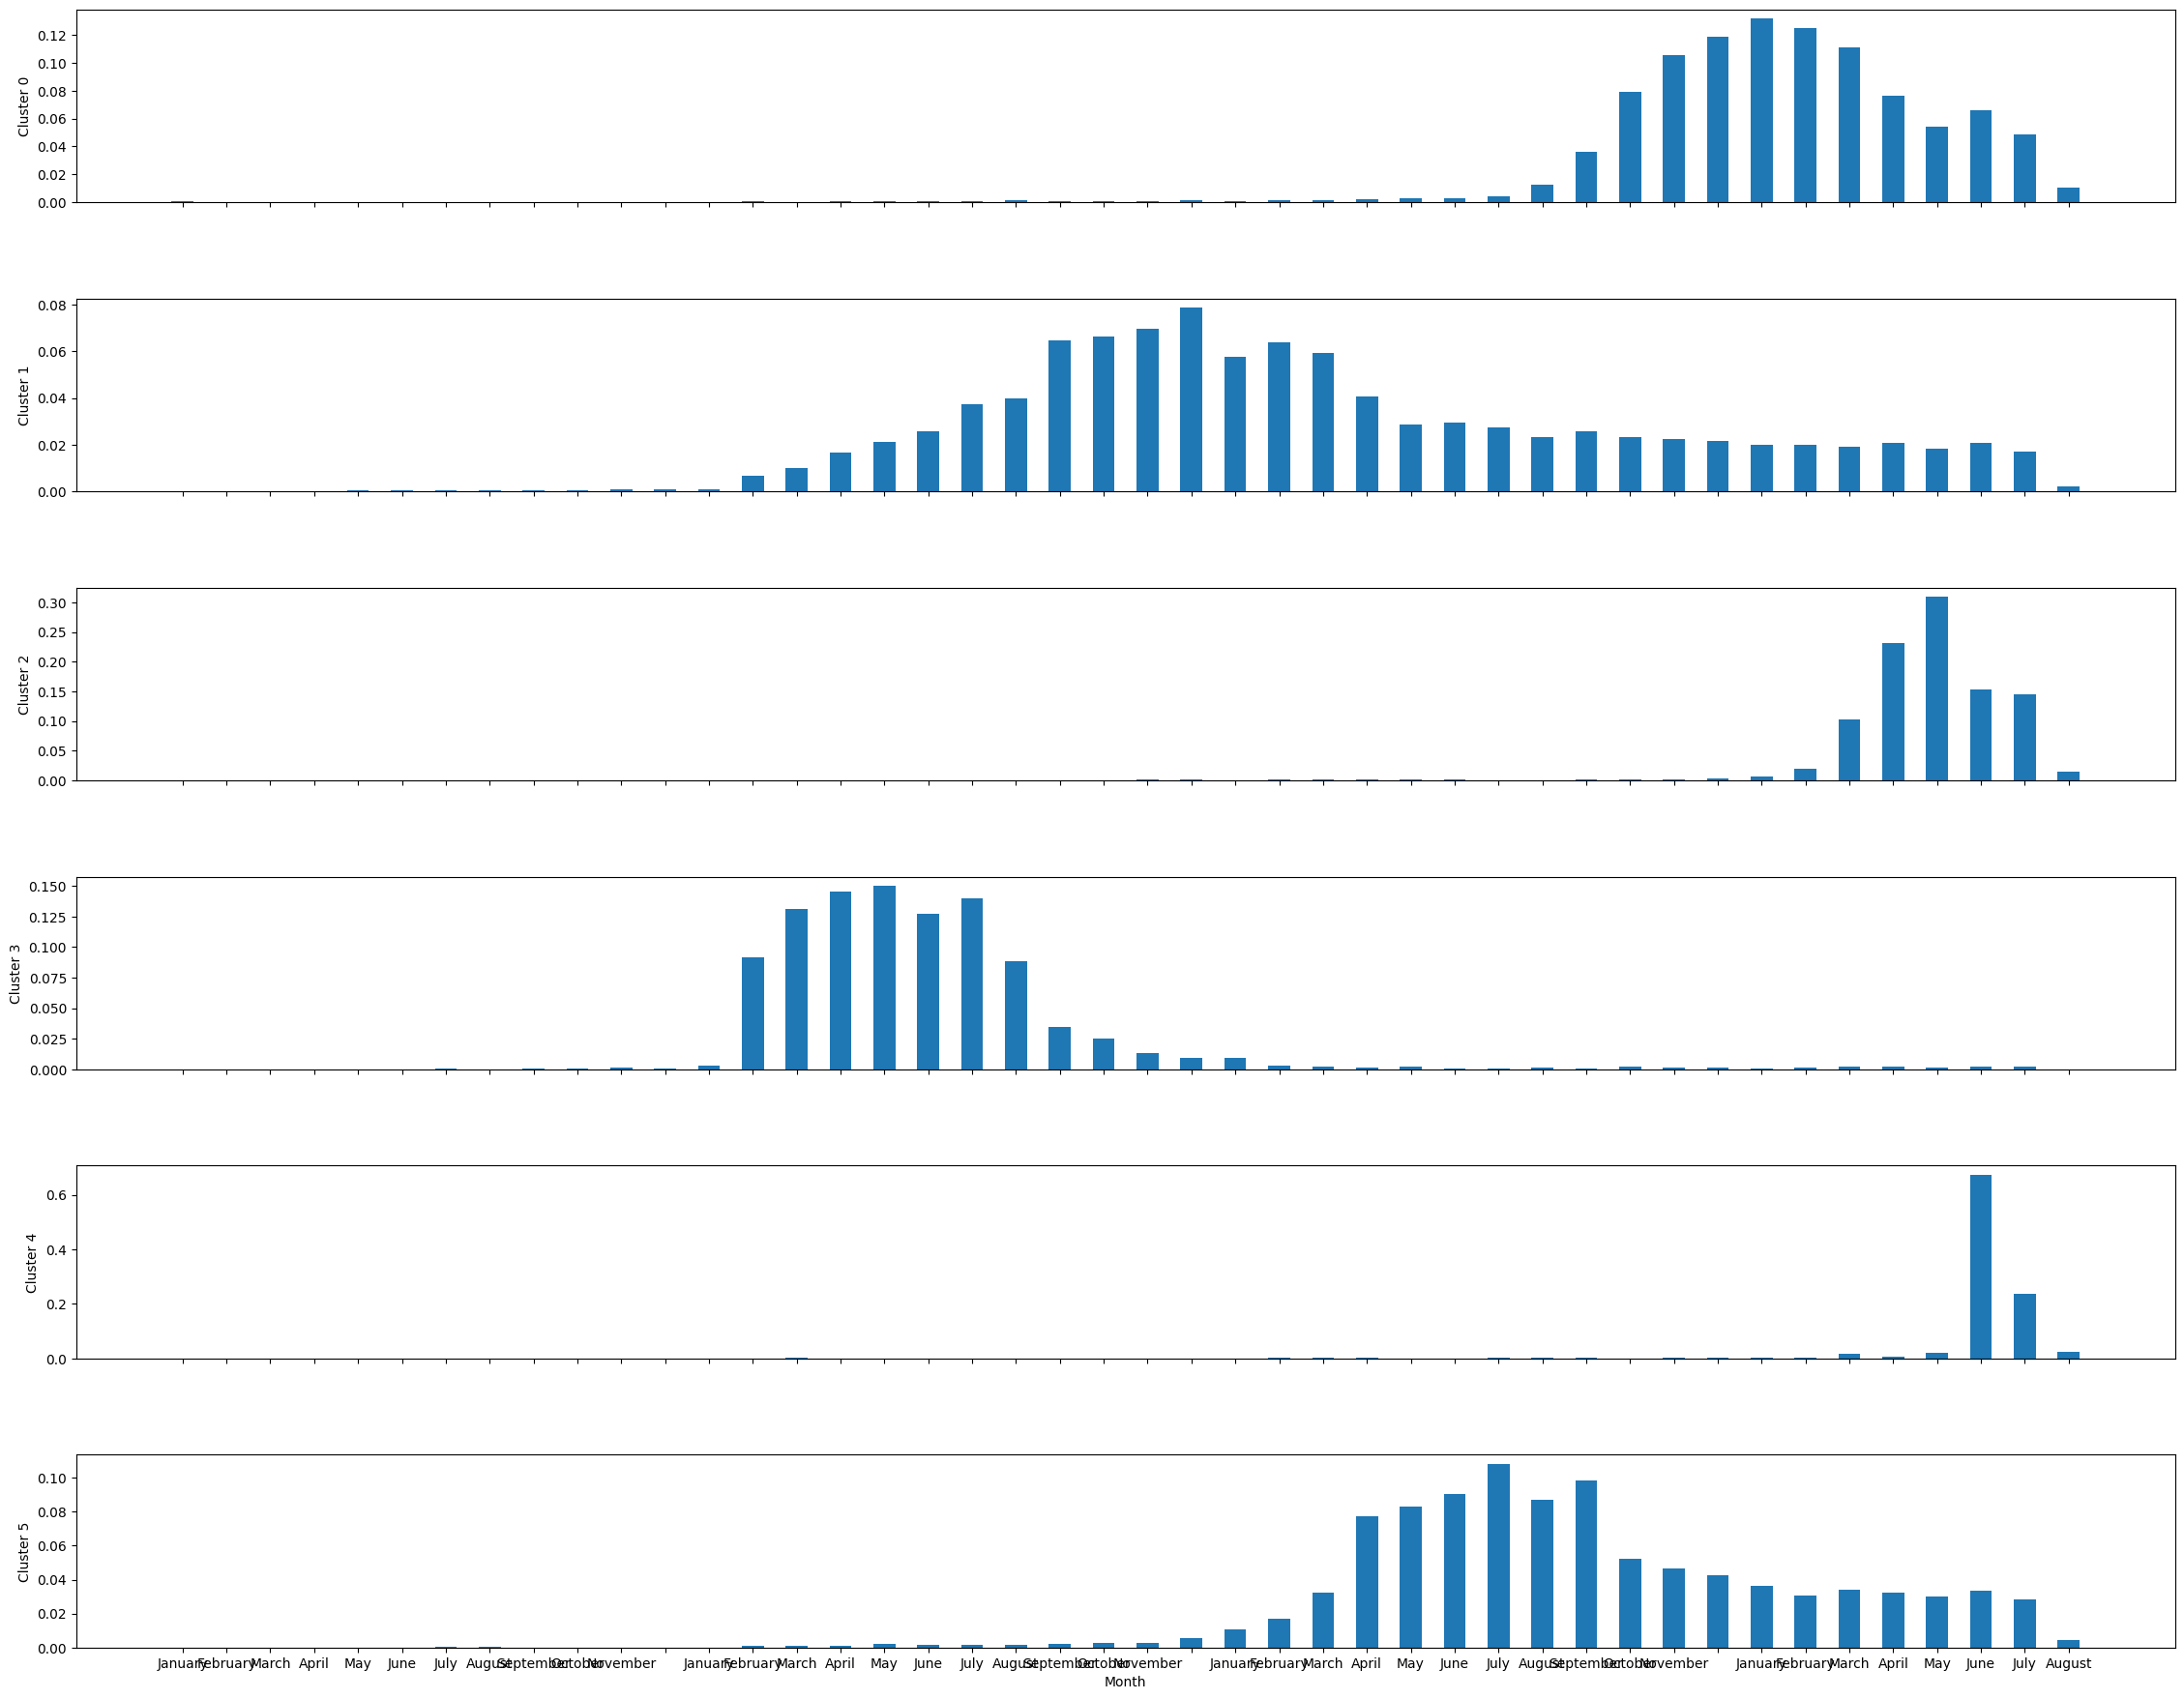

In [25]:
import calendar

# get cluster centers
cluster_centers = kmeans.cluster_centers_

# create bar plot
fig, ax = plt.subplots(kmeans.n_clusters, 1, figsize=(28, 22), sharex=True)
x = np.arange(len(cluster_centers[0]))
width = 0.50
for i, cluster in enumerate(cluster_centers):
    ax[i].bar(x, cluster, width)
    ax[i].set_ylabel(f'Cluster {i}')
ax[-1].set_xlabel('Month')

# set x-ticks and labels to represent months
month_labels = [calendar.month_name[(i+1) % 12] for i in range(len(x))]
ax[-1].set_xticks(x)
ax[-1].set_xticklabels(month_labels)

# add some space for y-ticks
plt.subplots_adjust(hspace=0.5)